In [62]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers, losses, metrics, optimizers, regularizers
from sklearn.datasets import load_diabetes, load_iris, load_boston, load_breast_cancer, load_wine

In [63]:
wine = load_wine()

In [64]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [65]:
pd.DataFrame(wine.data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [66]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
train_data, test_data, train_targets, test_targets = train_test_split(wine.data, 
                                                                     wine.target, 
                                                                     test_size = 1/3,
                                                                     random_state = 1)

In [69]:
train_data.shape

(118, 13)

In [70]:
test_data.shape

(60, 13)

In [71]:
train_data = np.array(train_data).astype("int")
test_data = np.array(test_data).astype("int")

In [72]:
LIMIT_WORD = 5000

In [73]:
def vectorize_sequences(sequences, dimension = LIMIT_WORD):
    
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
        
    return result

In [74]:
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

In [75]:
train_data

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [76]:
from tensorflow.keras.utils import to_categorical

In [77]:
train_targets = to_categorical(train_targets)
test_targets = to_categorical(test_targets)

In [78]:
test_targets.shape

(60, 3)

In [79]:
train_targets[0]

array([0., 1., 0.], dtype=float32)

In [119]:
def build_model():

    model = models.Sequential()

    model.add(layers.Dense(64,  
                           activation = "relu", 
                           kernel_regularizer = regularizers.l1_l2(0.001), 
                           input_shape = (LIMIT_WORD, )))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(32, 
                           activation = "relu", 
                           kernel_regularizer = regularizers.l1_l2(0.001)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(16, 
                           activation = "relu", 
                           kernel_regularizer = regularizers.l1_l2(0.001)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(3, 
                           activation = "softmax"))

    model.compile(optimizer = optimizers.RMSprop(lr = 0.001), 
                  loss = losses.categorical_crossentropy, 
                  metrics = metrics.categorical_accuracy)
    
    return model

In [120]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_score = []

In [122]:
for i in range(k):
    
    print("Processing Fold: {}".format(i))
    
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[: i * num_val_samples], 
                                        train_data[(i + 1) * num_val_samples:]], 
                                       axis = 0)
    
    partial_train_targets = np.concatenate([train_targets[: i * num_val_samples], 
                                            train_targets[(i + 1) * num_val_samples:]], 
                                            axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_data, 
                       partial_train_targets, 
                       epochs = num_epochs, 
                       verbose = 0, 
                       batch_size = 1, 
                       validation_data = (val_data, val_targets))
    
    x = history.history["val_categorical_accuracy"]
    all_score.append(x)

Processing Fold: 0
Processing Fold: 1
Processing Fold: 2
Processing Fold: 3


In [123]:
average = [
    np.mean([hist[i] for hist in all_score]) for i in range(num_epochs)
]

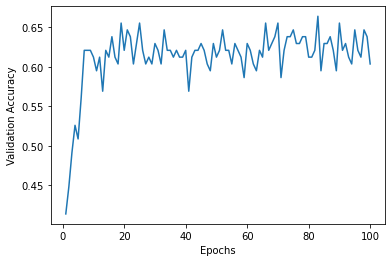

In [128]:
plt.plot(range(1, len(average) + 1), average)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

In [129]:
model = build_model()

In [132]:
model.fit(train_data, 
          train_targets, 
          epochs = 82, 
          batch_size = 256, 
          validation_data = (test_data, test_targets))

Epoch 1/82
1/1 [==============================] - 3s 3s/step - loss: 8.8761 - categorical_accuracy: 0.2966 - val_loss: 7.6091 - val_categorical_accuracy: 0.4000
Epoch 2/82
1/1 [==============================] - 0s 126ms/step - loss: 7.6084 - categorical_accuracy: 0.3559 - val_loss: 6.7722 - val_categorical_accuracy: 0.4167
Epoch 3/82
1/1 [==============================] - 0s 130ms/step - loss: 6.7698 - categorical_accuracy: 0.4492 - val_loss: 6.1433 - val_categorical_accuracy: 0.5833
Epoch 4/82
1/1 [==============================] - 0s 135ms/step - loss: 6.1407 - categorical_accuracy: 0.5763 - val_loss: 5.6213 - val_categorical_accuracy: 0.7000
Epoch 5/82
1/1 [==============================] - 0s 120ms/step - loss: 5.6159 - categorical_accuracy: 0.6780 - val_loss: 5.1832 - val_categorical_accuracy: 0.7500
Epoch 6/82
1/1 [==============================] - 0s 110ms/step - loss: 5.1768 - categorical_accuracy: 0.7034 - val_loss: 4.7965 - val_categorical_accuracy: 0.7167
Epoch 7/82
1/1 [===

1/1 [==============================] - 0s 326ms/step - loss: 1.4598 - categorical_accuracy: 0.9237 - val_loss: 1.5500 - val_categorical_accuracy: 0.8000
Epoch 51/82
1/1 [==============================] - 0s 161ms/step - loss: 1.4270 - categorical_accuracy: 0.9237 - val_loss: 1.5258 - val_categorical_accuracy: 0.8167
Epoch 52/82
1/1 [==============================] - 0s 167ms/step - loss: 1.4254 - categorical_accuracy: 0.9576 - val_loss: 1.5206 - val_categorical_accuracy: 0.8167
Epoch 53/82
1/1 [==============================] - 0s 174ms/step - loss: 1.4054 - categorical_accuracy: 0.9237 - val_loss: 1.5139 - val_categorical_accuracy: 0.8333
Epoch 54/82
1/1 [==============================] - 0s 157ms/step - loss: 1.4175 - categorical_accuracy: 0.9153 - val_loss: 1.5077 - val_categorical_accuracy: 0.8000
Epoch 55/82
1/1 [==============================] - 0s 160ms/step - loss: 1.4132 - categorical_accuracy: 0.9068 - val_loss: 1.4977 - val_categorical_accuracy: 0.8167
Epoch 56/82
1/1 [=====

In [133]:
results = model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 12ms/step - loss: 1.3401 - categorical_accuracy: 0.8333


In [134]:
print("Accuracy: {}".format(results[1]))

Accuracy: 0.8333333134651184
